In [744]:
from k_means_const_manhatten import KMeansConstrained
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

## Creating the delivery Locations

In [745]:
def create_locations(x, y, n):
    loc = []

    for _ in range(n):
        loc_x = random.randint(int(x[0]), int(y[0])) + random.randint(int((x[0] - int(x[0]))*10000), int((y[0] - int(y[0]))*10000)) / 10000
        loc_y = random.randint(int(x[1]), int(y[1])) + random.randint(int((x[1] - int(x[1]))*10000), int((y[1] - int(y[1]))*10000)) / 10000
        loc.append([loc_x,loc_y])
        
    return loc

## Visualizing the data

In [746]:
def initial_plot(delivery_loc):
    loc = np.array(delivery_loc)
    plt.scatter(loc[:,0], loc[:,1])
    plt.title("Delivery Locations")
    plt.show()

In [747]:
def clusters_plot(clusters, centroids):
    for i in clusters:
        points = np.array(clusters[i])
        plt.scatter(points[:,0], points[:,1])
        #try
        center = np.mean(points, axis=0)
        radius = max(np.linalg.norm(point - center) for point in points)

        # Plot the circle
        circle = plt.Circle(center, radius, color='lightblue', fill=True, alpha=0.5)
        plt.gca().add_artist(circle)
        #try
    plt.scatter(centroids[:,0], centroids[:,1], marker='^', c="black")
    plt.title("After Clustering")
    plt.show()

In [748]:
def dp_plot(clusters, centroids, dp):
    for i in clusters:
        points = np.array(clusters[i])
        plt.scatter(points[:,0], points[:,1])
        #try
        center = np.mean(points, axis=0)
        radius = max(np.linalg.norm(point - center) for point in points)

        # Plot the circle
        circle = plt.Circle(center, radius, color='lightblue', fill=True, alpha=0.5)
        plt.gca().add_artist(circle)
        #try
    plt.scatter(centroids[:,0], centroids[:,1], marker='^', c="black")
    plt.scatter(dp[0], dp[1], marker='+',s=200, c="red")
    plt.title("After DP Creation")
    plt.show()

In [749]:
def final_plot(clusters, dp):
    colors = ['blue', 'green', 'orange', 'purple', 'brown']

    for i in clusters:
        pts = np.array(clusters[i])
        plt.scatter(pts[:,0], pts[:,1])
        #try
        points = pts[1:-1,:]
        center = np.mean(points, axis=0)
        radius = max(np.linalg.norm(point - center) for point in points)

        # Plot the circle
        circle = plt.Circle(center, radius, color='lightblue', fill=True, alpha=0.5)
        plt.gca().add_artist(circle)
        #try

        for j in range(len(pts)-1):
            pt_1 = pts[j]
            pt_2 = pts[j+1]

            # x axis
            f_pt = np.array([pt_1[0], pt_1[0]])
            s_pt = np.array([pt_1[1], pt_2[1]])

            # y axis
            t_pt = np.array([pt_1[0], pt_2[0]])
            l_pt = np.array([pt_2[1], pt_2[1]])

            plt.plot(f_pt, s_pt, c=colors[i % len(colors)])
            plt.plot(t_pt, l_pt, c=colors[i % len(colors)])

    plt.scatter(dp[0], dp[1], c="red", marker='X',s=200)
    plt.title("Final Result")
    plt.show()

## KMeans Clustering

In [750]:
def KMeans(delivery_loc, n, k):
    n_cluster = n//k if n%k == 0 else n//k + 1

    model = KMeansConstrained(n_clusters=n_cluster, size_min=1, size_max=k)
    model.fit_predict(np.array(delivery_loc))

    labels = model.labels_
    clusters = {label:[] for label in range(n_cluster)}

    for i in range(len(delivery_loc)):
        clusters[labels[i]].append(delivery_loc[i])

    return model.cluster_centers_, clusters

In [751]:
from k_means_constrained import KMeansConstrained

def KMeans_Euclidian(delivery_loc, n, k):
    n_cluster = n//k if n%k == 0 else n//k + 1

    model = KMeansConstrained(n_clusters=n_cluster, size_min=1, size_max=k)
    model.fit_predict(np.array(delivery_loc))

    labels = model.labels_
    clusters = {label:[] for label in range(n_cluster)}

    for i in range(len(delivery_loc)):
        clusters[labels[i]].append(delivery_loc[i])

    return model.cluster_centers_, clusters

## Calculate DP

In [752]:
def calculate_dp(centroids):
    x = [i for i,j in centroids]
    y = [j for i,j in centroids]

    loc_x = np.median(x)
    loc_y = np.median(y)

    return [loc_x, loc_y]

## Traveling Salesman Problem

In [753]:
def calculate_distance(point1, point2):
    return (abs(point1[0]-point2[0]) + abs(point1[1]-point2[1]))

In [754]:
def tsp(cluster, opt_dp):
    cluster.insert(0, opt_dp)
    unvisited = cluster.copy()
    tour = [opt_dp]
    unvisited.remove(opt_dp)

    while unvisited:
        nearest_point = min(unvisited, key=lambda x: calculate_distance(tour[-1], x))
        tour.append(nearest_point)
        unvisited.remove(nearest_point)

    # Return to the starting point to complete the cycle
    tour.append(opt_dp)
    
    return tour

## Main

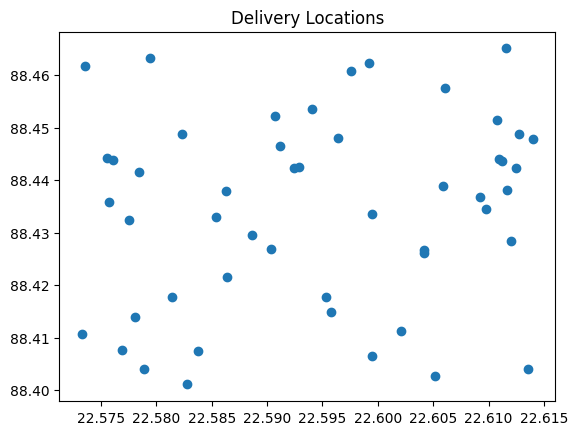

In [755]:
#no of delivery locations and drone capacity
n = 50
k = 5

# creating the boundary
x = [22.5726, 88.4010]
y = [22.6141, 88.4654]
delivery_loc = create_locations(x, y, n)

# Visualize the data
initial_plot(delivery_loc)

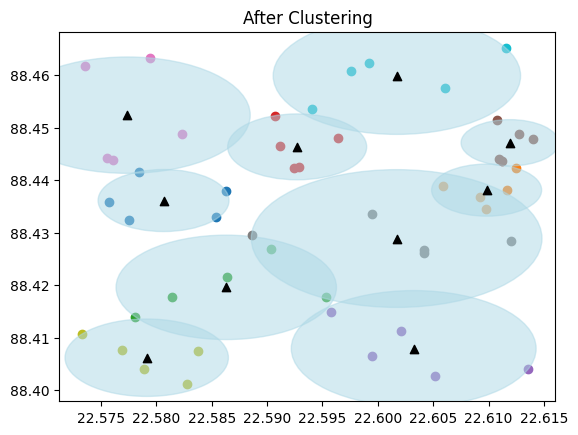

In [756]:
# Cluster the data and get the labels and centroids
centroids, clusters = KMeans(delivery_loc, n, k)

# Visualize the data
clusters_plot(clusters, centroids)

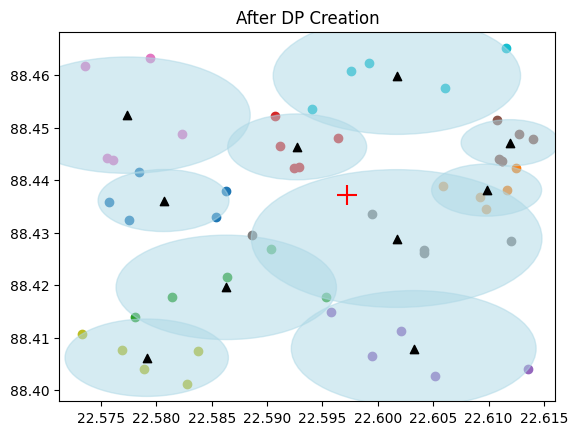

In [757]:
# Calculate DP
DP = calculate_dp(centroids)

# Visualize the data
dp_plot(clusters, centroids, DP)

In [758]:
# Shortest path calculation in each cluster
for i in clusters:
    clusters[i] = tsp(clusters[i], DP)


In [759]:
for i in clusters:
    print("Path",i,":")
    for j in clusters[i]:
        print(j,"->",end=" ")
    print("End")

Path 0 :
[22.597209999999997, 88.43713] -> [22.5863, 88.4379] -> [22.5854, 88.433] -> [22.5775, 88.4324] -> [22.5757, 88.4358] -> [22.5784, 88.4416] -> [22.597209999999997, 88.43713] -> End
Path 1 :
[22.597209999999997, 88.43713] -> [22.6059, 88.4389] -> [22.6092, 88.4368] -> [22.6098, 88.4345] -> [22.6117, 88.4381] -> [22.6125, 88.4423] -> [22.597209999999997, 88.43713] -> End
Path 2 :
[22.597209999999997, 88.43713] -> [22.5904, 88.4269] -> [22.5864, 88.4216] -> [22.5814, 88.4177] -> [22.5781, 88.414] -> [22.5953, 88.4178] -> [22.597209999999997, 88.43713] -> End
Path 3 :
[22.597209999999997, 88.43713] -> [22.5929, 88.4425] -> [22.5924, 88.4423] -> [22.5912, 88.4466] -> [22.5907, 88.4523] -> [22.5964, 88.4481] -> [22.597209999999997, 88.43713] -> End
Path 4 :
[22.597209999999997, 88.43713] -> [22.5958, 88.415] -> [22.6021, 88.4113] -> [22.5995, 88.4066] -> [22.6052, 88.4027] -> [22.6136, 88.4041] -> [22.597209999999997, 88.43713] -> End
Path 5 :
[22.597209999999997, 88.43713] -> [22.6

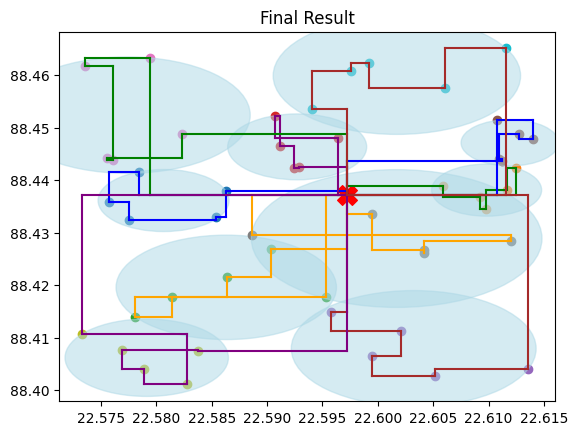

In [760]:
# Final Visualization
final_plot(clusters, DP)

## Calculate Total DIstance

In [761]:
def total_distance(clusters):
    total = 0
    for i in clusters:
        pts = clusters[i]
        for j in range(len(pts)-1):
            total += calculate_distance(pts[j], pts[j+1])
    
    return total

*Total distance in manhattan cluster*

In [762]:
total_distance(clusters)

0.8279400000000123

*Total distance in euclidian cluster*

In [763]:
# Cluster the data and get the labels and centroids
centroids_2, clusters_2 = KMeans_Euclidian(delivery_loc, n, k)

# Calculate DP
DP_2 = calculate_dp(centroids)

# Shortest path calculation in each cluster
for i in clusters_2:
    clusters_2[i] = tsp(clusters_2[i], DP_2)

for i in clusters_2:
    print("Path",i,":")
    for j in clusters_2[i]:
        print(j,"->",end=" ")
    print("End")

total_distance(clusters_2)

Path 0 :
[22.597209999999997, 88.43713] -> [22.6059, 88.4389] -> [22.6092, 88.4368] -> [22.6098, 88.4345] -> [22.6117, 88.4381] -> [22.6125, 88.4423] -> [22.597209999999997, 88.43713] -> End
Path 1 :
[22.597209999999997, 88.43713] -> [22.5886, 88.4296] -> [22.5904, 88.4269] -> [22.5864, 88.4216] -> [22.5814, 88.4177] -> [22.5781, 88.414] -> [22.597209999999997, 88.43713] -> End
Path 2 :
[22.597209999999997, 88.43713] -> [22.5854, 88.433] -> [22.5775, 88.4324] -> [22.5757, 88.4358] -> [22.5761, 88.4438] -> [22.5784, 88.4416] -> [22.597209999999997, 88.43713] -> End
Path 3 :
[22.597209999999997, 88.43713] -> [22.5941, 88.4536] -> [22.5976, 88.4608] -> [22.5992, 88.4624] -> [22.6061, 88.4576] -> [22.6116, 88.4651] -> [22.597209999999997, 88.43713] -> End
Path 4 :
[22.597209999999997, 88.43713] -> [22.5838, 88.4074] -> [22.5769, 88.4077] -> [22.5789, 88.4041] -> [22.5828, 88.4011] -> [22.5733, 88.4107] -> [22.597209999999997, 88.43713] -> End
Path 5 :
[22.597209999999997, 88.43713] -> [22.

0.857999999999997